# Redes Neuronales Superficiales y Profundas

Este cuaderno está diseñado para estudiantes de posgrado que deseen comprender los fundamentos de las redes neuronales superficiales y profundas desde un enfoque teórico y práctico. Usaremos solo **NumPy**, **Matplotlib** y **Pandas** para implementar redes neuronales desde cero, sin depender de bibliotecas como TensorFlow o PyTorch. Cubriremos:

- Conceptos básicos: neuronas, capas, pesos, sesgos.
- Funciones de activación: sigmoide, ReLU, tanh, sus fortalezas y debilidades.
- Propagación hacia adelante (forward propagation).
- Retropropagación (backpropagation): derivación detallada, importancia y código.
- Redes superficiales vs. profundas: por qué las capas adicionales ayudan.
- Ejemplos prácticos: clasificación y regresión con complejidad escalada.

En las redes profundas, alternaremos entre ReLU y tanh en las capas ocultas para explorar sus efectos combinados. El objetivo es que puedas programar una red neuronal básica desde cero y entender los fundamentos matemáticos. ¡Empecemos!

## 1. Introducción a las Redes Neuronales

Una red neuronal es un modelo computacional inspirado en el cerebro humano, compuesto por **neuronas** organizadas en **capas**. Cada neurona recibe entradas, las combina con pesos, suma un sesgo y aplica una función de activación.

Matemáticamente, una neurona se representa como:

$$ z = \sum_{i=1}^n w_i x_i + b $$
$$ a = \sigma(z) $$

Donde:
- $x_i$: entradas ($i=1, \dots, n$).
- $w_i$: pesos.
- $b$: sesgo.
- $\sigma$: función de activación.
- $a$: salida.

**Fortalezas**:
- Modelan relaciones no lineales.
- Adaptables a clasificación y regresión.

**Debilidades**:
- Requieren ajuste de hiperparámetros.
- Sensibles a inicialización y datos ruidosos.

Implementemos una neurona simple.

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# Función para una neurona simple
def neurona_simple(x, w, b, activacion='sigmoide'):
    z = np.dot(w, x) + b
    if activacion == 'sigmoide':
        a = 1 / (1 + np.exp(-z))
    elif activacion == 'relu':
        a = np.maximum(0, z)
    elif activacion == 'tanh':
        a = np.tanh(z)
    else:
        a = z
    return a

# Ejemplo: neurona con 2 entradas
x = np.array([1, 2])
w = np.array([0.5, -0.3])
b = 0.1

salida = neurona_simple(x, w, b, 'sigmoide')
print(f'Salida de la neurona: {salida:.4f}')

Salida de la neurona: 0.5000


**Explicación del código**:
- `x`: vector de entrada (dos características).
- `w`: pesos asociados.
- `b`: sesgo.
- Calculamos $z = w^T x + b$ con `np.dot`.
- Aplicamos sigmoide: $\sigma(z) = \frac{1}{1 + e^{-z}}$.

## 2. Funciones de Activación

Las funciones de activación introducen **no linealidad**, permitiendo modelar problemas complejos. Sin ellas, la red sería una regresión lineal.

Funciones comunes:

1. **Sigmoide**: $\sigma(z) = \frac{1}{1 + e^{-z}}$
   - **Rango**: $(0, 1)$.
   - **Fortalezas**: Ideal para clasificación binaria.
   - **Debilidades**: Gradientes desvanecientes.

2. **ReLU**: $\text{ReLU}(z) = \max(0, z)$
   - **Rango**: $[0, \infty)$.
   - **Fortalezas**: Eficiente, acelera convergencia.
   - **Debilidades**: Neuronas "muertas" si $z < 0$.

3. **Tanh**: $\tanh(z) = \frac{e^z - e^{-z}}{e^z + e^{-z}}$
   - **Rango**: $(-1, 1)$.
   - **Fortalezas**: Centrado en cero.
   - **Debilidades**: Gradientes desvanecientes.

Visualicemos estas funciones.

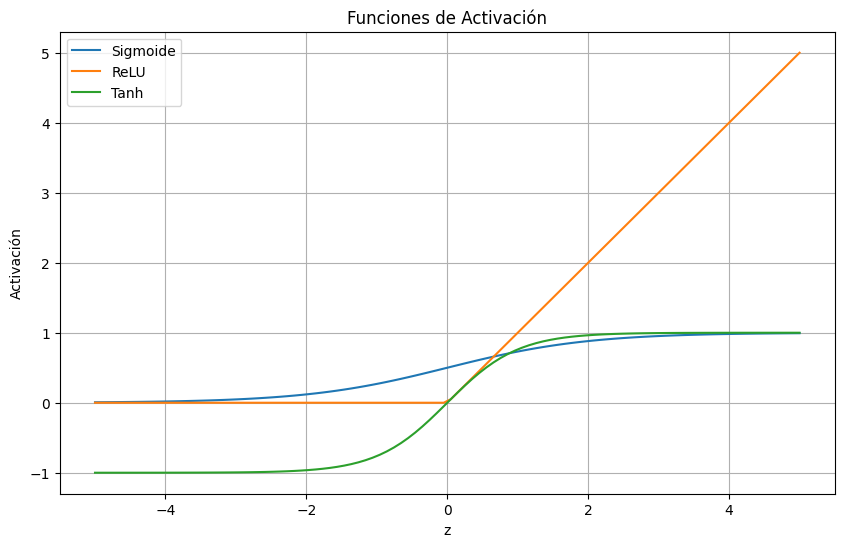

In [3]:
# Visualización de funciones de activación
z = np.linspace(-5, 5, 100)
sigmoide = 1 / (1 + np.exp(-z))
relu = np.maximum(0, z)
tanh = np.tanh(z)

plt.figure(figsize=(10, 6))
plt.plot(z, sigmoide, label='Sigmoide')
plt.plot(z, relu, label='ReLU')
plt.plot(z, tanh, label='Tanh')
plt.xlabel('z')
plt.ylabel('Activación')
plt.title('Funciones de Activación')
plt.legend()
plt.grid(True)
plt.show()

**Intuición**: ReLU activa selectivamente, mientras que tanh centra los datos, lo que puede estabilizar el aprendizaje en capas profundas.

In [4]:
# Ejemplo: ReLU vs. Tanh
x = np.array([1, -2])
w = np.array([0.5, 0.3])
b = -0.1

salida_relu = neurona_simple(x, w, b, 'relu')
salida_tanh = neurona_simple(x, w, b, 'tanh')

print(f'Salida con ReLU: {salida_relu:.4f}')
print(f'Salida con Tanh: {salida_tanh:.4f}')

Salida con ReLU: 0.0000
Salida con Tanh: -0.1974


**Análisis**:
- ReLU da 0 si $z < 0$, "apagando" neuronas.
- Tanh da valores entre -1 y 1, útil para normalización.

## 3. Redes Neuronales Superficiales

Una red superficial tiene una **capa de entrada**, una **capa oculta** y una **capa de salida**. La capa oculta introduce no linealidad.

Para una red con $n$ entradas, $m$ neuronas ocultas y $k$ salidas:

$$ Z^{[1]} = W^{[1]} X + b^{[1]} $$
$$ A^{[1]} = \sigma^{[1]}(Z^{[1]}) $$
$$ Z^{[2]} = W^{[2]} A^{[1]} + b^{[2]} $$
$$ A^{[2]} = \sigma^{[2]}(Z^{[2]}) $$

**Fortalezas**:
- Modela no linealidades simples.
- Computacionalmente ligera.

**Debilidades**:
- Limitada para problemas complejos.

In [8]:
# Red neuronal superficial
class RedSuperficial:
    def __init__(self, n_entradas, n_ocultas, n_salidas):
        self.W1 = np.random.randn(n_ocultas, n_entradas) * 0.3
        self.b1 = np.zeros((n_ocultas, 1))
        self.W2 = np.random.randn(n_salidas, n_ocultas) * 0.3
        self.b2 = np.zeros((n_salidas, 1))
    
    def sigmoide(self, z):
        return 1 / (1 + np.exp(-z))
    
    def forward(self, X):
        self.Z1 = np.dot(self.W1, X) + self.b1
        self.A1 = np.tanh(self.Z1)
        self.Z2 = np.dot(self.W2, self.A1) + self.b2
        self.A2 = self.sigmoide(self.Z2)
        return self.A2

# Ejemplo: clasificación binaria
X = np.array([[0, 0], [0, 1], [1, 0], [1, 1]]).T
red = RedSuperficial(n_entradas=2, n_ocultas=4, n_salidas=1)
salidas = red.forward(X)
print('Salidas iniciales:')
print(salidas)

Salidas iniciales:
[[0.5        0.51225021 0.55247036 0.56041519]]


**Explicación**:
- Inicializamos pesos con valores aleatorios pequeños.
- Usamos `tanh` en la capa oculta y sigmoide en la salida.

## 4. La Necesidad de Gradientes para el Entrenamiento

Minimizamos una **función de pérdida** $L(\hat{y}, y)$ ajustando pesos $W$ y sesgos $b$ mediante optimización, como **Descenso de Gradiente Estocástico (SGD)** o **Adam**.

**Descenso de Gradiente**:
$$ W = W - \alpha \frac{\partial L}{\partial W} $$
$$ b = b - \alpha \frac{\partial L}{\partial b} $$

**SGD**:
- Usa mini-lotes para calcular gradientes.
- **Fortalezas**: Escalable.
- **Debilidades**: Sensible a $\alpha$.

**Adam**:
- Adapta $\alpha$ con momentos.
- **Fortalezas**: Convergencia rápida.
- **Debilidades**: Complejo.

**¿Por qué gradientes?**:
- Indican cómo ajustar parámetros para reducir $L$.
- Sin gradientes, la optimización sería inviable.

## 5. Retropropagación: Derivación Detallada

La **retropropagación** calcula gradientes de $L$ respecto a $W^{[l]}$, $b^{[l]}$ usando la regla de la cadena, propagando el error hacia atrás.

**¿Por qué interesa?**:
- **Eficiencia**: Calcula gradientes en una pasada.
- **Escalabilidad**: Aplicable a redes profundas.
- **Generalidad**: Funciona con cualquier pérdida diferenciable.

Pérdida de entropía cruzada:

$$ L = - \frac{1}{m} \sum_{i=1}^m \left[ y_i \log(A^{[2]}_i) + (1 - y_i) \log(1 - A^{[2]}_i) \right] $$

### 5.1 Derivación de los Gradientes

Para una red con una capa oculta:
- $Z^{[1]} = W^{[1]} X + b^{[1]}$, $A^{[1]} = \sigma(Z^{[1]})$ (tanh).
- $Z^{[2]} = W^{[2]} A^{[1]} + b^{[2]}$, $A^{[2]} = \sigma(Z^{[2]})$ (sigmoide).

#### Paso 1: Gradiente en la capa de salida ($\delta^{[2]}$)

$$ \delta^{[2]}_i = \frac{\partial L_i}{\partial Z^{[2]}_i} = \frac{\partial L_i}{\partial A^{[2]}_i} \cdot \frac{\partial A^{[2]}_i}{\partial Z^{[2]}_i} $$

$$ \frac{\partial L_i}{\partial A^{[2]}_i} = - \left[ \frac{y_i}{A^{[2]}_i} - \frac{1 - y_i}{1 - A^{[2]}_i} \right] $$

$$ \frac{\partial A^{[2]}_i}{\partial Z^{[2]}_i} = A^{[2]}_i (1 - A^{[2]}_i) $$

$$ \delta^{[2]}_i = A^{[2]}_i - y_i $$

#### Paso 2: Gradientes de $W^{[2]}$ y $b^{[2]}$

$$ \frac{\partial L}{\partial W^{[2]}_{kj}} = \frac{1}{m} \sum_{i=1}^m \delta^{[2]}_{k,i} A^{[1]}_{j,i} $$
$$ \frac{\partial L}{\partial b^{[2]}_k} = \frac{1}{m} \sum_{i=1}^m \delta^{[2]}_{k,i} $$

#### Paso 3: Propagar el error ($\delta^{[1]}$)

$$ \delta^{[1]}_{j,i} = \sum_{k=1}^k \delta^{[2]}_{k,i} W^{[2]}_{kj} \cdot (1 - (A^{[1]}_{j,i})^2) $$

#### Paso 4: Gradientes de $W^{[1]}$ y $b^{[1]}$

$$ \frac{\partial L}{\partial W^{[1]}_{jh}} = \frac{1}{m} \sum_{i=1}^m \delta^{[1]}_{j,i} X_{h,i} $$
$$ \frac{\partial L}{\partial b^{[1]}_j} = \frac{1}{m} \sum_{i=1}^m \delta^{[1]}_{j,i} $$

**Fortalezas**:
- Eficiente y escalable.
- Permite entrenar redes profundas.

**Debilidades**:
- Sensible a gradientes desvanecientes.
- Requiere funciones diferenciables.

In [36]:
# Red con retropropagación
class RedSuperficial:
    def __init__(self, n_entradas, n_ocultas, n_salidas):
        self.W1 = np.random.randn(n_ocultas, n_entradas) * 0.01
        self.b1 = np.zeros((n_ocultas, 1))
        self.W2 = np.random.randn(n_salidas, n_ocultas) * 0.01
        self.b2 = np.zeros((n_salidas, 1))
    
    def sigmoide(self, z):
        return 1 / (1 + np.exp(-z))
    
    def sigmoide_derivada(self, z):
        s = self.sigmoide(z)
        return s * (1 - s)
    
    def tanh_derivada(self, z):
        return 1 - np.tanh(z)**2
    
    def forward(self, X):
        self.Z1 = np.dot(self.W1, X) + self.b1
        self.A1 = np.tanh(self.Z1)
        self.Z2 = np.dot(self.W2, self.A1) + self.b2
        self.A2 = self.sigmoide(self.Z2)
        return self.A2
    
    def backward(self, X, Y, learning_rate=0.01):
        m = X.shape[1]
        dZ2 = self.A2 - Y
        dW2 = (1/m) * np.dot(dZ2, self.A1.T)
        db2 = (1/m) * np.sum(dZ2, axis=1, keepdims=True)
        dZ1 = np.dot(self.W2.T, dZ2) * self.tanh_derivada(self.Z1)
        dW1 = (1/m) * np.dot(dZ1, X.T)
        db1 = (1/m) * np.sum(dZ1, axis=1, keepdims=True)
        self.W1 -= learning_rate * dW1
        self.b1 -= learning_rate * db1
        self.W2 -= learning_rate * dW2
        self.b2 -= learning_rate * db2

# Ejemplo: XOR
X = np.array([[0, 0], [0, 1], [1, 0], [1, 1]]).T
Y = np.array([[0, 1, 1, 0]])

red = RedSuperficial(2, 4, 1)
for i in range(1000):
    red.forward(X)
    red.backward(X, Y, learning_rate=0.1)

print('Predicciones después de entrenamiento:')
print(red.forward(X))

Predicciones después de entrenamiento:
[[0.5000422  0.50000554 0.4999945  0.49995783]]


**Explicación**:
- `dZ2 = A2 - Y` es $\delta^{[2]}$.
- Propagamos el error con `dZ1`.
- Actualizamos con SGD.

## 6. Redes Neuronales Profundas

Las redes profundas tienen múltiples capas ocultas, capturando jerarquías de características. Alternaremos entre **ReLU** y **tanh** en las capas ocultas para combinar la eficiencia de ReLU con la normalización de tanh.

**¿Por qué alternar?**:
- ReLU acelera convergencia al evitar gradientes desvanecientes.
- Tanh centra los datos, estabilizando capas profundas.

Para $L$ capas:

$$ Z^{[l]} = W^{[l]} A^{[l-1]} + b^{[l]} $$
$$ A^{[l]} = \sigma^{[l]}(Z^{[l]}) $$

Donde $\sigma^{[l]}$ es ReLU si $l$ es impar, tanh si $l$ es par.

**Fortalezas**:
- Capturan relaciones complejas.
- Alternar activaciones puede mejorar estabilidad.

**Debilidades**:
- Más datos y computación.
- Riesgo de sobreajuste.

In [13]:
# Red neuronal profunda con activaciones alternadas
class RedProfunda:
    def __init__(self, capas):
        self.capas = capas
        self.params = {}
        for l in range(1, len(capas)):
            self.params[f'W{l}'] = np.random.randn(capas[l], capas[l-1]) * 0.01
            self.params[f'b{l}'] = np.zeros((capas[l], 1))
    
    def relu(self, z):
        return np.maximum(0, z)
    
    def relu_derivada(self, z):
        return (z > 0).astype(float)
    
    def tanh(self, z):
        return np.tanh(z)
    
    def tanh_derivada(self, z):
        return 1 - np.tanh(z)**2
    
    def sigmoide(self, z):
        return 1 / (1 + np.exp(-z))
    
    def sigmoide_derivada(self, z):
        s = self.sigmoide(z)
        return s * (1 - s)
    
    def forward(self, X):
        self.A = [X]
        self.Z = [None]
        for l in range(1, len(self.capas)):
            Z = np.dot(self.params[f'W{l}'], self.A[-1]) + self.params[f'b{l}']
            if l == len(self.capas)-1:
                A = self.sigmoide(Z)  # Sigmoide en la salida
            else:
                A = self.relu(Z) if l % 2 == 1 else self.tanh(Z)  # Alternar ReLU y tanh
            self.Z.append(Z)
            self.A.append(A)
        return self.A[-1]
    
    def backward(self, X, Y, learning_rate=0.01):
        m = X.shape[1]
        dA = self.A[-1] - Y
        for l in range(len(self.capas)-1, 0, -1):
            if l == len(self.capas)-1:
                dZ = dA * self.sigmoide_derivada(self.Z[l])
            else:
                dZ = dA * (self.relu_derivada(self.Z[l]) if l % 2 == 1 else self.tanh_derivada(self.Z[l]))
            dW = (1/m) * np.dot(dZ, self.A[l-1].T)
            db = (1/m) * np.sum(dZ, axis=1, keepdims=True)
            if l > 1:
                dA = np.dot(self.params[f'W{l}'].T, dZ)
            self.params[f'W{l}'] -= learning_rate * dW
            self.params[f'b{l}'] -= learning_rate * db

# Ejemplo: XOR
X = np.array([[0, 0], [0, 1], [1, 0], [1, 1]]).T
Y = np.array([[0, 1, 1, 0]])

red = RedProfunda(capas=[2, 4, 4, 1])
for i in range(2000):
    red.forward(X)
    red.backward(X, Y, learning_rate=0.1)

print('Predicciones después de entrenamiento (ReLU-tanh alternados):')
print(red.forward(X))

Predicciones después de entrenamiento (ReLU-tanh alternados):
[[0.5        0.49999999 0.50000007 0.49999995]]


**Explicación**:
- Alternamos ReLU (capas impares) y tanh (capas pares).
- La retropropagación usa la derivada correspondiente a cada capa.
- La combinación puede mejorar la estabilidad en problemas como XOR.

## 7. Ejemplo Práctico: Regresión con Complejidad Escalonada

Apliquemos modelos de complejidad creciente a $y = x^2 + \epsilon$, alternando ReLU y tanh en las redes profundas.

**Pérdida**: Error cuadrático medio:

$$ L = \frac{1}{m} \sum_{i=1}^m (\hat{y}_i - y_i)^2 $$

Probaremos:
1. Regresión lineal.
2. Red con 1 capa oculta (ReLU).
3. Red con 2 capas ocultas (ReLU, tanh).
4. Red con 4 capas ocultas (ReLU, tanh, ReLU, tanh).

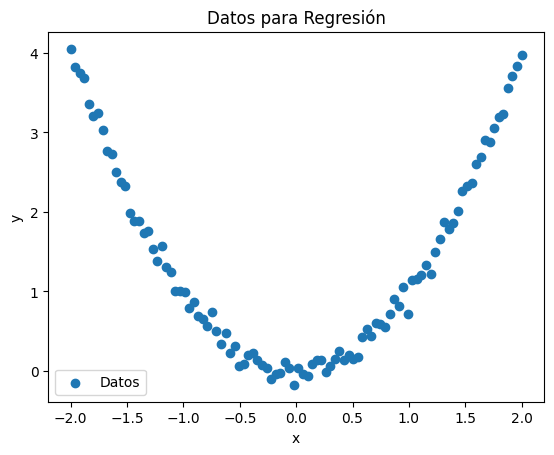

In [14]:
# Generar datos
np.random.seed(42)
X = np.linspace(-2, 2, 100).reshape(1, -1)
Y = X**2 + np.random.randn(1, 100) * 0.1
plt.scatter(X.flatten(), Y.flatten(), label='Datos')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Datos para Regresión')
plt.legend()
plt.show()

### 7.1 Regresión Lineal

Modelo: $\hat{y} = w x + b$.

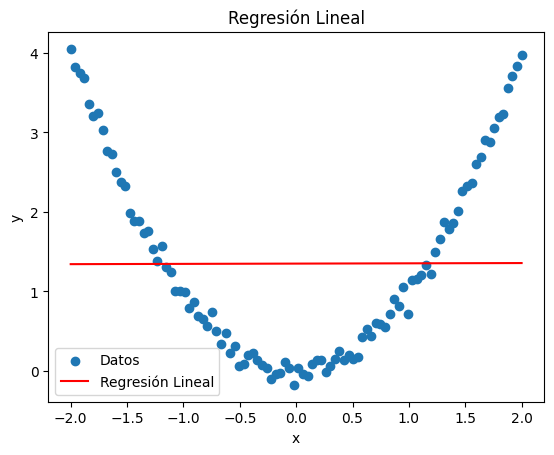

In [15]:
# Regresión lineal
class RegresionLineal:
    def __init__(self):
        self.w = np.random.randn(1, 1) * 0.01
        self.b = np.zeros((1, 1))
    
    def forward(self, X):
        return np.dot(self.w, X) + self.b
    
    def backward(self, X, Y, learning_rate=0.01):
        m = X.shape[1]
        Y_pred = self.forward(X)
        dW = (1/m) * np.dot(Y_pred - Y, X.T)
        db = (1/m) * np.sum(Y_pred - Y, axis=1, keepdims=True)
        self.w -= learning_rate * dW
        self.b -= learning_rate * db

# Entrenar
modelo = RegresionLineal()
for i in range(1000):
    modelo.forward(X)
    modelo.backward(X, Y, learning_rate=0.01)

# Visualizar
Y_pred = modelo.forward(X)
plt.scatter(X.flatten(), Y.flatten(), label='Datos')
plt.plot(X.flatten(), Y_pred.flatten(), 'r', label='Regresión Lineal')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Regresión Lineal')
plt.legend()
plt.show()

**Análisis**:
- No captura la relación cuadrática.
- **Debilidad**: Incapaz de modelar no linealidades.

### 7.2 Red con 1 Capa Oculta

Usamos ReLU en la capa oculta.

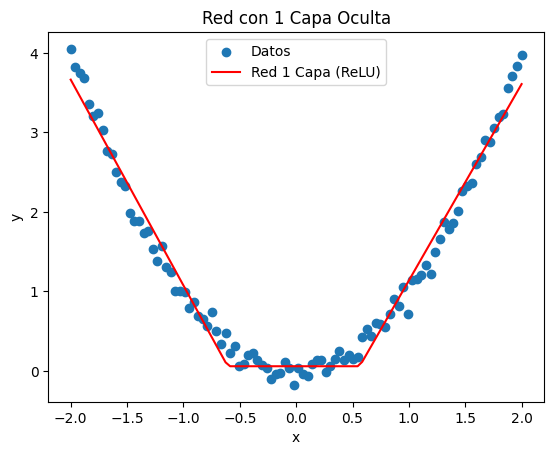

In [16]:
# Red con 1 capa oculta
class Red1Capa:
    def __init__(self, n_entradas, n_ocultas, n_salidas):
        self.W1 = np.random.randn(n_ocultas, n_entradas) * 0.01
        self.b1 = np.zeros((n_ocultas, 1))
        self.W2 = np.random.randn(n_salidas, n_ocultas) * 0.01
        self.b2 = np.zeros((n_salidas, 1))
    
    def relu(self, z):
        return np.maximum(0, z)
    
    def relu_derivada(self, z):
        return (z > 0).astype(float)
    
    def forward(self, X):
        self.Z1 = np.dot(self.W1, X) + self.b1
        self.A1 = self.relu(self.Z1)
        self.Z2 = np.dot(self.W2, self.A1) + self.b2
        self.A2 = self.Z2  # Salida lineal
        return self.A2
    
    def backward(self, X, Y, learning_rate=0.01):
        m = X.shape[1]
        dZ2 = self.A2 - Y
        dW2 = (1/m) * np.dot(dZ2, self.A1.T)
        db2 = (1/m) * np.sum(dZ2, axis=1, keepdims=True)
        dZ1 = np.dot(self.W2.T, dZ2) * self.relu_derivada(self.Z1)
        dW1 = (1/m) * np.dot(dZ1, X.T)
        db1 = (1/m) * np.sum(dZ1, axis=1, keepdims=True)
        self.W1 -= learning_rate * dW1
        self.b1 -= learning_rate * db1
        self.W2 -= learning_rate * dW2
        self.b2 -= learning_rate * db2

# Entrenar
red = Red1Capa(1, 10, 1)
for i in range(5000):
    red.forward(X)
    red.backward(X, Y, learning_rate=0.01)

# Visualizar
Y_pred = red.forward(X)
plt.scatter(X.flatten(), Y.flatten(), label='Datos')
plt.plot(X.flatten(), Y_pred.flatten(), 'r', label='Red 1 Capa (ReLU)')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Red con 1 Capa Oculta')
plt.legend()
plt.show()

**Análisis**:
- Captura algo de la no linealidad.
- **Fortaleza**: Mejora sobre regresión lineal.

### 7.3 Red con 2 Capas Ocultas

Usamos ReLU en la primera capa oculta y tanh en la segunda.

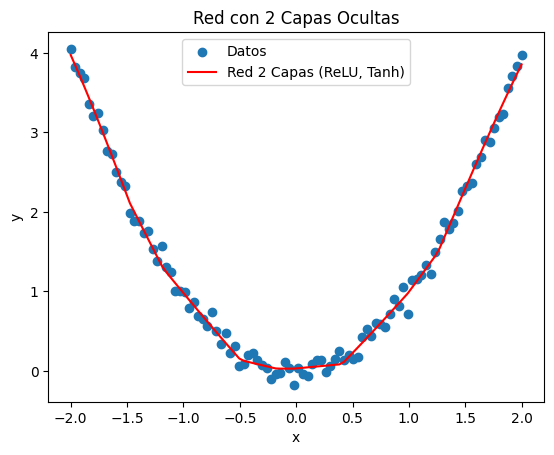

In [17]:
# Red con 2 capas ocultas
class RedMultiCapas:
    def __init__(self, capas):
        self.capas = capas
        self.params = {}
        for l in range(1, len(capas)):
            self.params[f'W{l}'] = np.random.randn(capas[l], capas[l-1]) * 0.01
            self.params[f'b{l}'] = np.zeros((capas[l], 1))
    
    def relu(self, z):
        return np.maximum(0, z)
    
    def relu_derivada(self, z):
        return (z > 0).astype(float)
    
    def tanh(self, z):
        return np.tanh(z)
    
    def tanh_derivada(self, z):
        return 1 - np.tanh(z)**2
    
    def forward(self, X):
        self.A = [X]
        self.Z = [None]
        for l in range(1, len(self.capas)):
            Z = np.dot(self.params[f'W{l}'], self.A[-1]) + self.params[f'b{l}']
            if l == len(self.capas)-1:
                A = Z  # Salida lineal
            else:
                A = self.relu(Z) if l % 2 == 1 else self.tanh(Z)
            self.Z.append(Z)
            self.A.append(A)
        return self.A[-1]
    
    def backward(self, X, Y, learning_rate=0.01):
        m = X.shape[1]
        dA = self.A[-1] - Y
        for l in range(len(self.capas)-1, 0, -1):
            dZ = dA if l == len(self.capas)-1 else dA * (self.relu_derivada(self.Z[l]) if l % 2 == 1 else self.tanh_derivada(self.Z[l]))
            dW = (1/m) * np.dot(dZ, self.A[l-1].T)
            db = (1/m) * np.sum(dZ, axis=1, keepdims=True)
            if l > 1:
                dA = np.dot(self.params[f'W{l}'].T, dZ)
            self.params[f'W{l}'] -= learning_rate * dW
            self.params[f'b{l}'] -= learning_rate * db

# Entrenar
red = RedMultiCapas(capas=[1, 10, 10, 1])
for i in range(5000):
    red.forward(X)
    red.backward(X, Y, learning_rate=0.05)

# Visualizar
Y_pred = red.forward(X)
plt.scatter(X.flatten(), Y.flatten(), label='Datos')
plt.plot(X.flatten(), Y_pred.flatten(), 'r', label='Red 2 Capas (ReLU, Tanh)')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Red con 2 Capas Ocultas')
plt.legend()
plt.show()

**Análisis**:
- ReLU y tanh combinados mejoran la captura de la forma cuadrática.
- **Fortaleza**: Mayor capacidad y estabilidad.

### 7.4 Red con 4 Capas Ocultas

Usamos ReLU, tanh, ReLU, tanh en las capas ocultas.

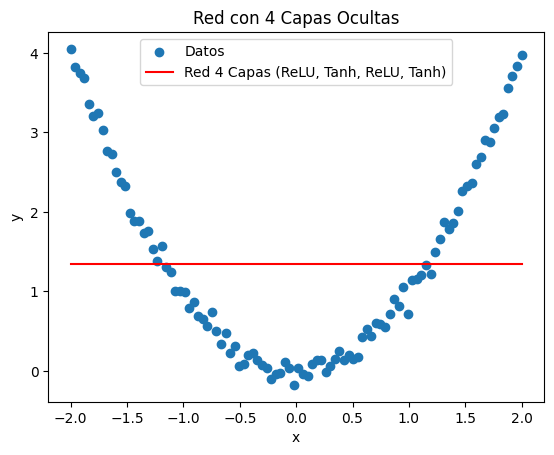

In [20]:
# Red con 3 capas ocultas
red = RedMultiCapas(capas=[1, 7, 7, 7, 1])
for i in range(5000):
    red.forward(X)
    red.backward(X, Y, learning_rate=.1)

# Visualizar
Y_pred = red.forward(X)
plt.scatter(X.flatten(), Y.flatten(), label='Datos')
plt.plot(X.flatten(), Y_pred.flatten(), 'r', label='Red 4 Capas (ReLU, Tanh, ReLU, Tanh)')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Red con 4 Capas Ocultas')
plt.legend()
plt.show()

**Análisis**:
- Alta precisión en la relación cuadrática.
- **Debilidad**: Riesgo de sobreajuste y mayor costo computacional.
- Alternar ReLU y tanh combina eficiencia con normalización.

Este cuaderno te permite implementar redes neuronales desde cero, alternando activaciones para optimizar el aprendizaje.